## AUC & ROC for exponential models

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
import seaborn as sns
import os
import sys
sys.path.append('..')
from paths import*

In [9]:
paths = Paths()
fig_save_path = paths.fig_save_path

In [19]:
data_files = os.listdir(paths.model_outputs)
data_files = [item for item in data_files if item[0]!= '.']
data_files = sorted(data_files)
data_files = [item for item in data_files if item[-3:] == 'csv']

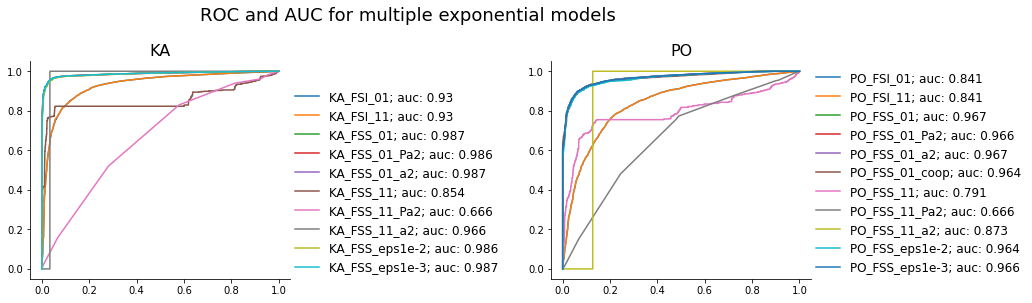

In [20]:
fig, ax = plt.subplots(1,2, figsize = (14, 4), facecolor = 'white')

for f in data_files:  
    data = pd.read_csv(paths.model_outputs + f)

    auc = metrics.roc_auc_score(data.stay, data.exponent_model)
    fpr, tpr, _ = metrics.roc_curve(data.stay, data.exponent_model)
    label = f[:-4] + '; auc: ' + str(np.round(auc, 3))
    
    if f[:2]== 'KA':
        i = 0
    elif f[:2]== 'PO':
        i = 1
    

    ax[i].plot(fpr, tpr, label= label)
    ax[i].legend(frameon = False, fontsize = 12, loc =(1, 0));
    
ax[0].set_title('KA', fontsize = 16)
ax[1].set_title('PO', fontsize = 16)


sns.despine()
plt.subplots_adjust(wspace = 1)
plt.suptitle('ROC and AUC for multiple exponential models', fontsize = 18, y = 1.07);

#plt.savefig(fig_save_path + 'roc&auc_for_multiple_exponentials.png', dpi = 300, bbox_inches='tight');

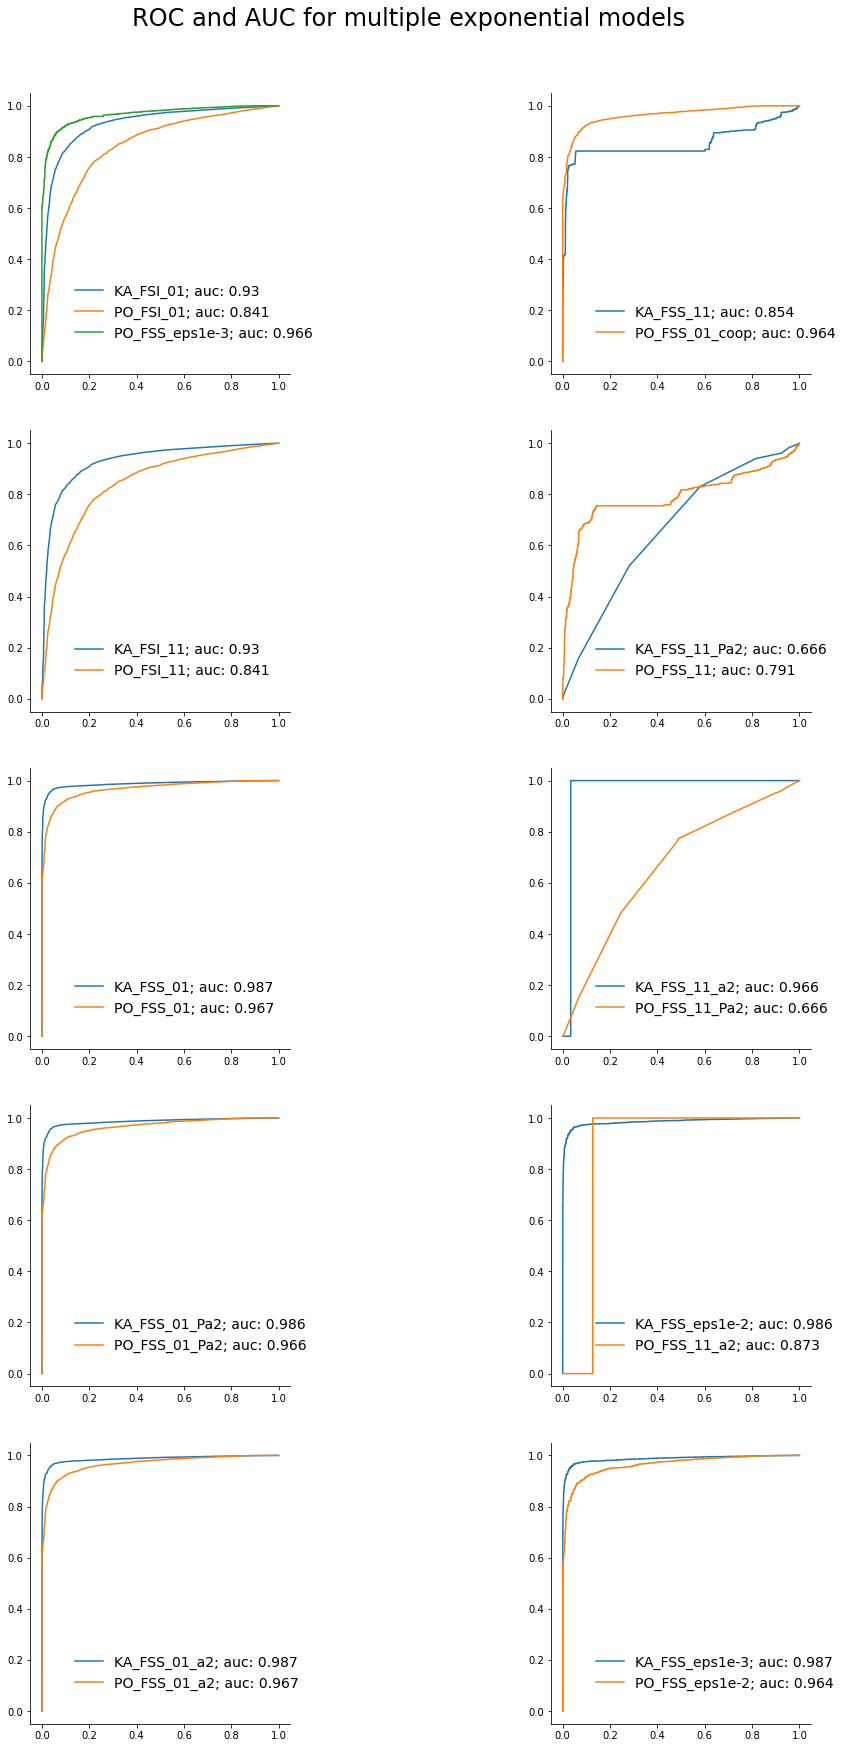

In [22]:
fig, ax = plt.subplots(5,2, figsize = (14, 30), facecolor = 'white')

r, c = 0, 0
for f in data_files:  
    data = pd.read_csv(paths.model_outputs + f)
    auc = metrics.roc_auc_score(data.stay, data.exponent_model)
    fpr, tpr, _ = metrics.roc_curve(data.stay, data.exponent_model)
    label = f[:-4] + '; auc: ' + str(np.round(auc, 3))
    
    ax[r, c].plot(fpr, tpr, label= label)
    ax[r, c].legend(frameon = False, fontsize = 14, loc =(0.15, 0.1));
    
    
    r += 1
#    print (r, c)
    
    
    if r == 5:
        if c == 1: 
            r = 0
            c = 0
        elif c == 0: 
            c = 1
            r = 0
    




sns.despine()
plt.subplots_adjust(wspace = 1)
plt.suptitle('ROC and AUC for multiple exponential models', fontsize = 24, y = 0.92);

#plt.savefig(fig_save_path + 'roc&auc_for_multiple_exponentials_10plots.png', dpi = 300, bbox_inches='tight');

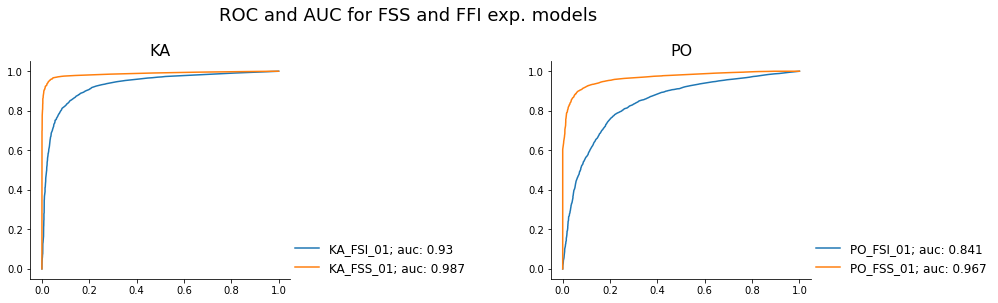

In [23]:
data_files_sub = ['KA_FSI_01.csv', 'KA_FSS_01.csv', 'PO_FSI_01.csv', 'PO_FSS_01.csv']

fig, ax = plt.subplots(1,2, figsize = (14, 4), facecolor = 'white')

for f in data_files_sub:  
    data = pd.read_csv(paths.model_outputs + f)
    auc = metrics.roc_auc_score(data.stay, data.exponent_model)
    fpr, tpr, _ = metrics.roc_curve(data.stay, data.exponent_model)
    label = f[:-4] + '; auc: ' + str(np.round(auc, 3))
    
    if f[:2]== 'KA':
        i = 0
    elif f[:2]== 'PO':
        i = 1
    

    ax[i].plot(fpr, tpr, label= label)
    ax[i].legend(frameon = False, fontsize = 12, loc =(1, 0));
    
ax[0].set_title('KA', fontsize = 16)
ax[1].set_title('PO', fontsize = 16)


sns.despine()
plt.subplots_adjust(wspace = 1)
plt.suptitle('ROC and AUC for FSS and FFI exp. models', fontsize = 18, y = 1.07);

#plt.savefig(fig_save_path + 'roc&auc_for_FFS_FFI_models.png', dpi = 300, bbox_inches='tight');

## Check for the angular ROC 

In [24]:
data = pd.read_csv(paths.model_outputs + 'KA_FSS_11_a2.csv')
data2 = pd.read_csv(paths.model_outputs + 'KA_FSS_01.csv')

po_data = pd.read_csv(paths.model_outputs + 'PO_FSS_11_a2.csv')
po_data2 = pd.read_csv(paths.model_outputs + 'PO_FSS_01.csv')

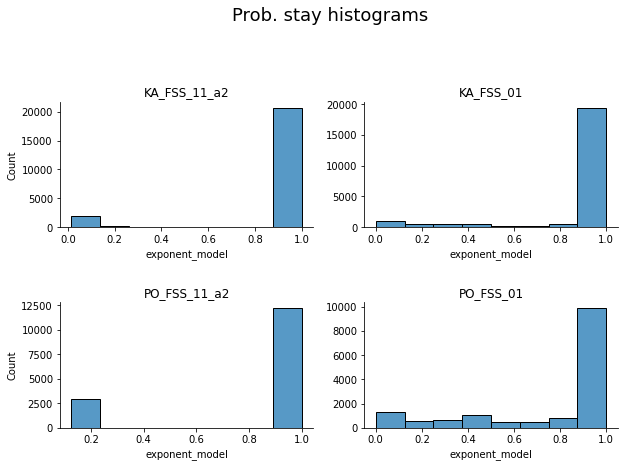

In [25]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))


sns_plot = sns.histplot(ax = axs[0, 0], data = data,  x = 'exponent_model', bins = 8)
sns_plot.set_title('KA_FSS_11_a2')
#sns_plot.set_ylabel('Pred. prob. distribution', fontsize = 12)

sns_plot = sns.histplot(ax = axs[0, 1], data = data2, x = 'exponent_model', bins = 8)
sns_plot.set_title('KA_FSS_01')
sns_plot.set_ylabel(None)





sns_plot = sns.histplot(ax = axs[1, 0], data = po_data,  x = 'exponent_model', bins = 8)
sns_plot.set_title('PO_FSS_11_a2')
#sns_plot.set_ylabel('Pred. prob. distribution', fontsize = 12)

sns_plot = sns.histplot(ax = axs[1, 1], data = po_data2, x = 'exponent_model', bins = 8)
sns_plot.set_title('PO_FSS_01')
sns_plot.set_ylabel(None)






sns.despine()
plt.subplots_adjust(hspace = 0.6)

plt.suptitle('Prob. stay histograms', fontsize = 18, y = 1.1);
#plt.savefig(fig_save_path + 'prob_stay_disribution.png', dpi = 300, bbox_inches='tight');